# Linear Regressions in Python

## Introduction

Linear regressions are one of the first machine learning algortithms that data scientists interact with. It is a very useful and powerful technique that can be used to predict the profitability of a certain data set. It can also help you understand customer behavior in a data set.

There are many types of regressions, such as linear regressions, polynomial regressions, logistic regressions, and others, but here, we are only going to study linear regressions and a bit of polynomial regressions.

## 1. What is a Linear Regression?

The goal of making a linear regression is to find a relationship between one or more features (the independent variables) and a continuous target variable (the dependent variable). They typically look like this (the values on the x and y axes can be changed):
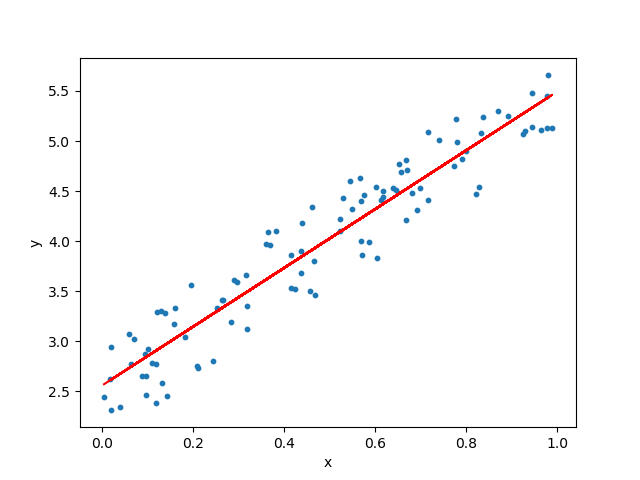

### 1a. The Math Behind It

A relationship between the variables x and y is typically represented by the equation:

y=mx+b

In this equation, y is the dependent variable — or the variable we are trying to predict or estimate; x is the independent variable — the variable we are using to make predictions; m is the slope of the regression line — it represents the effect x has on y. b is a constant, also known as the Y-intercept.

### 1b. Hypothesis of a Linear Regression

#### Linear Regression Model:

The linear regression model (or line of best fit) can be represented by the following equation:

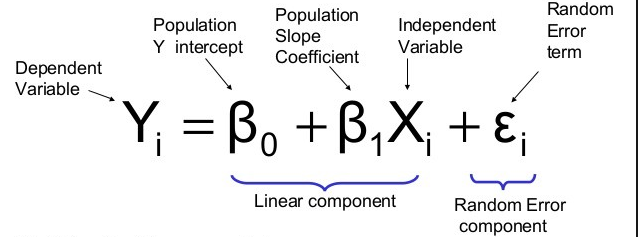

Where:

1. Yi is the predicted value
2. Xi is the independent variable
2. β1 is the slope
3. βo is the y-intercept
4. Єi is the random error, or bias term, that adds a residual to the data

#### Polynomial Regression Model:

With multiple variables, or a polynomial regression, the model looks like this:



Where:

1. Y is the predicted value
2. θ₀ is the bias term (or residual)
3. θ₁,…,θₙ are the model parameters
4. x₁, x₂,…,xₙ are the feature values

OR:

The above hypothesis can also be represented by:




Where:

1. θ is the model’s parameter vector including the bias term θ₀
2. x is the feature vector with x₀ =1

NOTE: In most cases, we will have multiple variables; it can be as little as two independent variables and up to hundreds (or theoretically even thousands) of variables. In those cases we will use a Multiple Linear Regression model (MLR), shown above, but most/some of the times a 2-variable linear model would be sufficient.

### 1c. The Line of Best Fit

#### Linear Regression:

The line of best fit, or the regression line, in a linear regression is the line that is the average, or "middle", line that takes into account all the data provided (except the outliers), and it matches up best with the data in the set.

They typically look like this (the yellow line is the line of best fit):
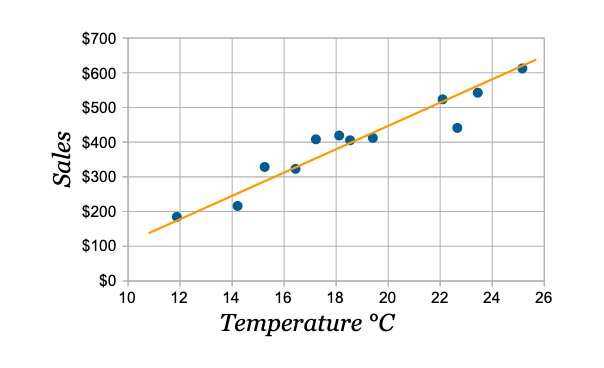

This line can help us predict future values and trends, which is a very, very useful thing in data science.

#### Polynomial Regression:

Depending on what the data looks like, we may use a polynomial regression instead of a linear one, which looks like this:

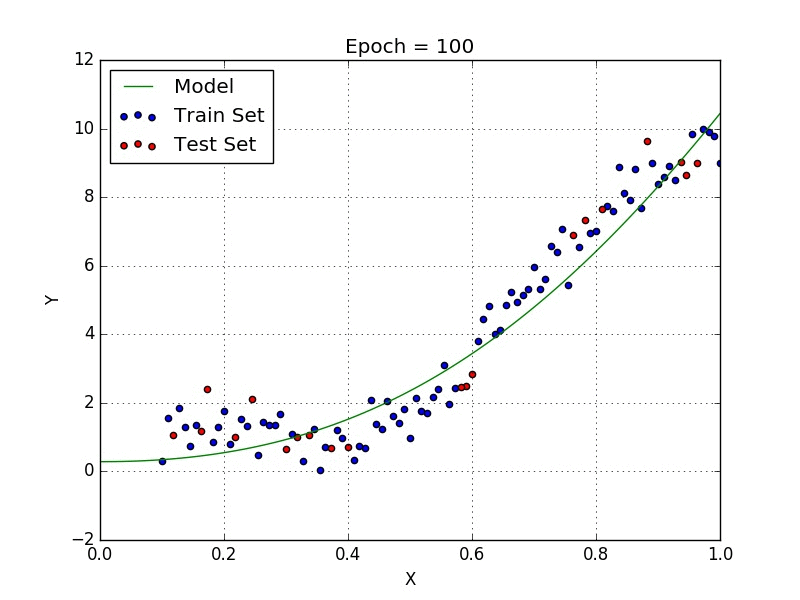

We may do this because the data isn't linear, or if we see that a polynomial equation will fit the data.

Advantages of using polynomial regressions:

 -  Polynomials provide the best approximation of the relationship between the dependent and independent variable
 -  A broad range of functions can fit under it
 -  They fit a wide range of curvature

Disadvantages of using polynomial regressions:

 -  The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis; in other words, they're too sensitive to outliers
 -  There are unfortunately fewer model validation tools for the detection of outliers in polynomial and nonlinear regressions than there are for linear regressions

### 1d. Residuals

The distance, or error, between the predicted values and the observed values in a linear regression are called residuals. Residuals do not exhibit any pattern, and adjacent residuals should generally not be the same, as they indicate that there is information missed by the system.

The residuals can be visualized by the vertical lines from the observed data value to the regression line, as shown:

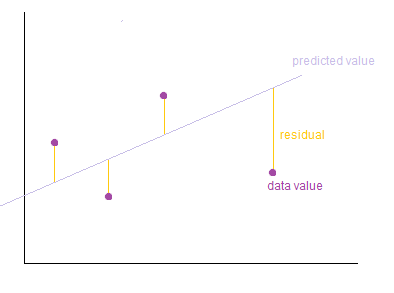

We can also plot only the residuals on a graph, called a residual plot, as so (in matplotlib):

In [ ]:
# This is a residual plot in matplotlib
import matplotlib.pyplot as plt
plt.scatter(prediction, prediction - y_test, c='g', s=40) # these variables are data sets and parameters in the plot
plt.hlines(y=0, xmin=0, xmax=100) # these set the domain and range of the plot
plt.title('Residual plot')
plt.ylabel('Residual')
# Note that variables are used here that aren't defined, so use your own variables as data and use your own parameters

You would get a graph similar to this:

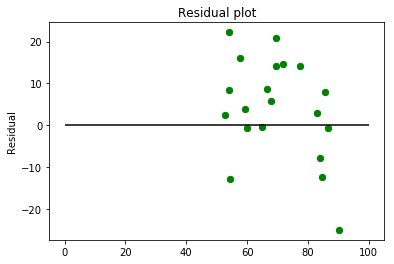

A non-random pattern of the residual plot indicates that the model:

1. Is missing a variable which has a significant contribution to the model target
2. Should maybe use a polynomial regression instead of a linear one
3. Has no interaction in the model between the terms

To define and measure the error of our model, we define the cost function as the sum of the squares of the residuals. The cost function is denoted by:

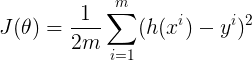

### 1e. Gradient Descent Method

Now, to minimize the cost function, we use gradient descent. It iteratively tweaks the parameters of the model in order to minimize the cost function, which always helps you find the line of best fit, which is the end goal here. 

You shouldn't tweak too largely, or else we might skip over the line of best fit, and you shouldn't tweak too little, or else it will take too many iterations to compute. Gradient descent finds the perfect pace to tweak in order to find the line of best fit.

The steps for gradient descent:

#### Step 1:

We first initialize the model parameters with some random values. This is called *random initialization*.

#### Step 2:

Now we need to measure how the cost function changes with change in its parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters θ₀, θ₁, … , θₙ, as so: 

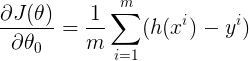
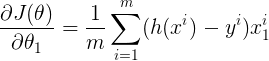

Similarly, the partial derivative of the cost function w.r.t to any parameter can be denoted by:

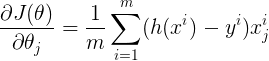

#### Step 3:

After computing the derivative we update the parameters as given below:

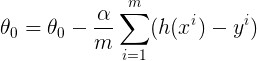
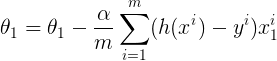

where α is the *learning parameter*.

#### Step 4: 

We repeat the steps 2,3 until the cost function converges to the minimum value. If the value of α is too small, the cost function takes a larger time to converge. If α is too large, the gradient descent may overshoot the minimum and may eventually fail to converge.

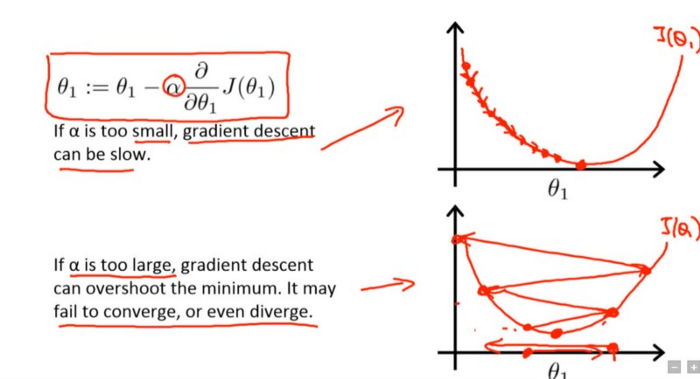

#### Types of Gradient Descent:

Note that there are 3 different types of gradient descent:

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent

##### Batch Gradient Descent:

 - In batch gradient descent, to calculate the gradient of the cost function, we need to sum all of the training examples for each step
 - If we have 3 million samples (or m training examples) then the gradient descent algorithm should sum 3 million samples for every epoch. To move a single step, we have to calculate 3 million times!
 - As so, batch gradient descent isn't fit for large datasets
 - Below is the code implementation for the batch gradient descent algorithm:

In [1]:
# this code performs gradient descent to find theta:
def BatchGD(X, y, theta, alpha, num_iters):
    m = y.size  # number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
    return theta

##### Stochastic Gradient Descent:

 - In stochastic gradient descent, we use one example or one training sample at each iteration instead of using the whole dataset at every step
 - Stochastic gradient descent, or SGD, is widely used for larger dataset trainings, is computationally faster, and can be parallel trained
 - In this, you need to randomly shuffle the training examples before calculating them
 - Below is the code implementation for SGD:

In [2]:
# Again, this code performs gradient descent to find theta:
def SGD(f, theta0, alpha, num_iters):
    start_iter = 0
    theta = theta0
    for iter in xrange(start_iter + 1, num_iters + 1):
        _, grad = f(theta)
        theta = theta - (alpha * grad) # there is NO dot product!
    return theta

Above, the arguments are defined as follows:

1. f -- the function to optimize, it takes a single argument and yields two outputs, a cost and the gradient with respect to the arguments
2. theta0 -- the initial point to start the SGD method from
3. num_iters -- the number of total iterations to run SGD for
4. theta -- the parameter value after SGD finishes

##### Mini-Batch Gradient Descent:

 - It is similar to SGD, but it uses n samples instead of 1 at each iteration

### 1f. Ordinary Least Squares Method

Another way you can minimize the cost function/find the best slope for the linear regression is the Ordinary Least Squares Method, or OLS.

To use this method, we apply the formula below to find the equation. Note that m and b are coefficients in the equation y=mx+b:

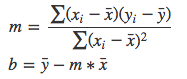

Where:

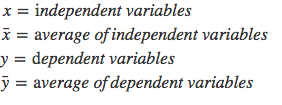

Things to keep in mind:

 - Relating to the b variable, if the model does not include x=0, then the prediction will become meaningless with only b. For example, if we have a dataset that relates height (x) and weight (y), then taking x=0 will make the equation have only a b value, which is completely meaningless, since in real life height and weight can never be zero
 - If the model includes the value of 0, then b will be the average of all predicted values when x=0. But, setting zero for all the predictor variables is often impossible
 - The value of b guarantees that the residuals have a mean of zero. If there is no 'b' term, then the regression will be forced to pass over the origin, and both the regression co-efficient and the prediction will be biased

This is a very good way to find the regression model if you don't want to do any calculus (and also if you want to reduce the SSR, info in 1g) but gradient descent is more reliable, as it can be used in multi-variable datasets, while OLS cannot.

Also, the OLS result will be very slightly different than the gradient descent result, but you will find that both of them fit the data very well.

### 1g.  Measuring Performance

To evaluate the performance of the model, we use the Coefficient of Determination (R²), the correlation coefficient (r), and also the root mean squared error (RMSE).

1. The R² score, or the coefficient of determination/correlation coefficient, explains how much the total variance of the dependent variable can be reduced by using the least square regression.

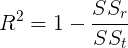

2. SSᵣ is the sum of the square of residuals. It gives information about how far the estimated regression line is from the horizontal ‘no relationship’ line (average of actual output):

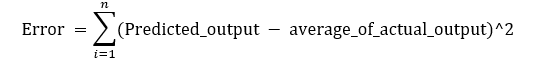
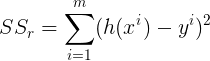

3. SSₜ is the total sum of errors if we take the mean of the observed values as the predicted value (also called the Total Sum of Squares, or SSTO):

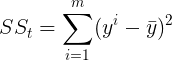

Or, in code:

In [ ]:
# sum of square of residuals
ssr = np.sum((y_pred - y_actual)**2)

#  total sum of squares
sst = np.sum((y_actual - np.mean(y_actual))**2)

# R2 score
r2_score = 1 - (ssr/sst)

4. The Correlation Coefficient, or r, is the square root of R^2. It is used as a measure for how correlated a model is, with 1 meaning that every point is positively correlated, and -1 meaning every point is negatively correlated. An r value of >0.7 or <-0.7 is considered to be a strong correlation, while values closer to 0 would be considered sparse. Note that r's domain is [-1,1], with -1 and 1 values for r being *perfect* fits, and as r moves closer to 0 it becomes more sparse.


     r=(+/-)sqrt(R^2)

5. RMSE is the square root of the average of the sum of the squares of residuals, shown below:

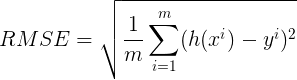

Or, in code:

In [ ]:
# mean squared error
mse = np.sum((y_pred - y_actual)**2)

# root mean squared error
# m is the number of training examples
import numpy as np
rmse = np.sqrt(mse/m)

NOTE: If R²=k, then we reduced the prediction error by k% by using regression.

### 1h. Assumptions of a Linear Regression

Before we actually start making a linear regression, there are a few conditions that need to be met.

There are 5 basic assumptions of the linear regression algorithm:?

#### 1. A Linear Relationship Between the Features and the Target:

Linear regressions only deal with linear relationships, as the name states. Without a linear relationship, the model falls apart, and we are unable to form a strong relationship (as well as the R^2 value being low).

#### 2. Little or no Multicollinearity Between the Features:

Multicollinearity is a state of very high inter-correlations or inter-associations among the independent variables. It is a type of disturbance in the data, and it weakens the statistical power of the regression model. 

We don't want any of the independent variables to be dependent on each other, or else the model will be biased and the actual dependent variable's relations won't be showed. What we do want in a model is a unit change in a feature affecting only the dependent variable. If unit changes in features affect other features, then the whole model will be messed up. Pair plots and heatmaps can be used for identifying highly correlated features.

To treat multicollinearity among 2 features, we can drop one feature, which gets rid of the dependence between the features, or combine the 2 features to form a new feature, which can then be used for prediction without any impracticalities.

Below are examples of low multicollinearity between features:

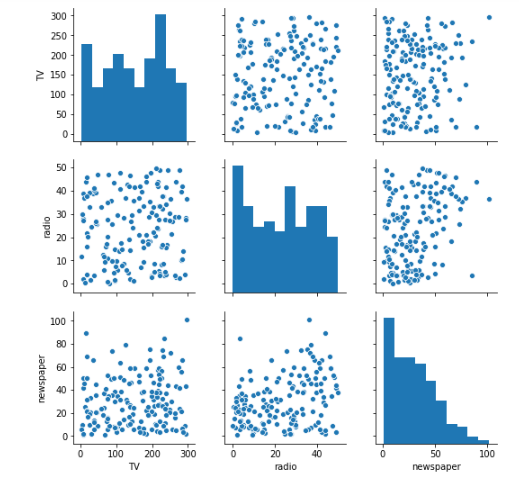

#### 3. Homoscedasticity

Homoscedasticity describes a situation in which the residuals (that is, the random disturbance in the relationship between the features and the target) is the same across all values of the independent variables. There should be no clear pattern in the distribution, and if there is a specific pattern, the data is heteroscedastic, which means that the data will be biased.

A scatter plot of residual values vs predicted values is a good way to check for homoscedasticity:


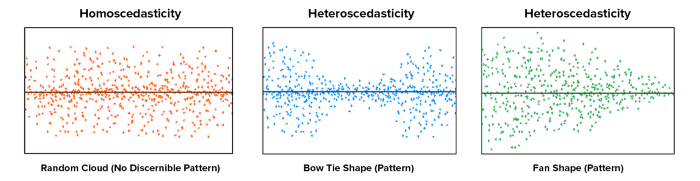

#### 4. Normal Distribution of Residuals

This assumption is similar to homoscedasticity, as they both relate to the spread of residuals. However, this assumption bases itself upon the idea that all the residuals should show a normal, non-polynomial distribution. But, a less known fact is that, as sample sizes increase, the normality assumption for the residuals isn't needed.

Normal distribution of the residuals can be validated by plotting a q-q plot, as shown below:

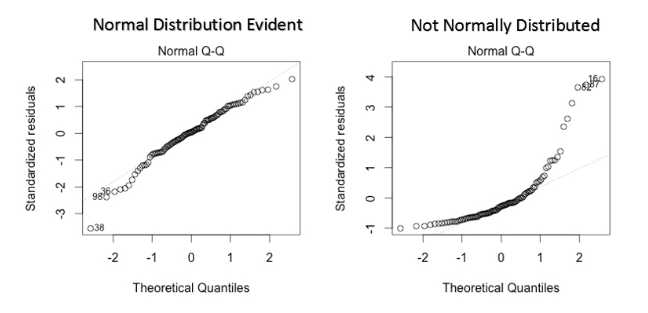

Note: More precisely, if we consider repeated sampling from our population, for large sample sizes, the distribution (across repeated samples) of the ordinary least squares estimates of the regression coefficients follow a normal distribution. As a consequence, for moderate to large sample sizes, non-normality of residuals should not adversely affect the usual inferential procedures. This result is a consequence of an extremely important result in statistics called the central limit theorem.

#### 5. Little or no Autocorrelation of the Residuals

Autocorrelation (or serial correlation) occurs when the residual errors are dependent on each other. The presence of correlation in the residuals drastically reduces the model’s accuracy. Autocorrelation of the error terms usually occurs in time series models, where the next instant is dependent on previous instant.

Autocorrelation can be tested with the help of the Durbin-Watson test. The null hypothesis of the test is that there is no serial correlation. The Durbin-Watson test statistics is defined as:

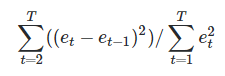

The test statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals. Thus, for r = 0, indicating no autocorrelation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence there is for positive autocorrelation. Similarly for it being closer to 4, the more evidence there is for negative serial correlation.

### 1i. Null-Hypothesis and P-Value

A null hypothesis is an initial claim that a researcher assumes is true unless there is strong evidence against it later on.

A p-value measures if you should accept or reject the null hypothesis.

Low p-value: If you have a low p-value, you should reject the null hypothesis, because the data indicates that the predictor value is related to the response.

High p-value: Changes in the predictor are not associated with change in target, which usually supports the null hypothesis.

## 2. Real Life Example:

We'll be using the Housing data set (which contains information about houses in Boston) for this real life example on linear regressions. Our end goal is to see what factors are correlated to the median values of houses in Boston and how much they are correlated, which can be acheived by finding a linear regression/polynomial regression related to the values of the houses.

### 2a. Basics of Scikit-Learn

SKLearn is the standard when it comes to machine learning in Python. It has many learning algorithms, for regression, classification, clustering and dimensionality reduction. 

In order to use linear regression, we need to import it:

In [1]:
from sklearn import linear_model

### 2a. Importing the Data Set

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

# we now load the housing data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston() # boston_dataset is a dictionary
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Above, the keys are as follows:

1. data: contains the information for various houses

2. target: prices of the house

3. feature_names: names of the features

4. DESCR: describes the dataset

More features can be found by:

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##### NOTE: the median prices of the homes indicated by the variable MEDV is our *target variable* and the remaining are the *feature variables* based on which we will predict the value of a house.

### 2b. Loading the Data

Now, we will load the data:

In [4]:
boston=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Notice that the target value, MEDV, is missing from the data, so we create a new column of target values and add it to the dataframe.

The description stats that MEDV means the median value of owner-occupied homes in $1000's (in Boston).

In [5]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now the MEDV value is in the dataframe.

### 2c. Data Preprocessing

This step won't take that long, but after loading the data, it’s a good practice to see if there are any missing values in the data. 

We count the number of missing values for each feature using isnull():

In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the dataset, which is good, so we can move on.

### 2d. Exploratory Data Analysis

Exploratory Data Analysis is a very important step to take before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

#### Step 1: Plot the Distribution

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

/Users/jadenchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


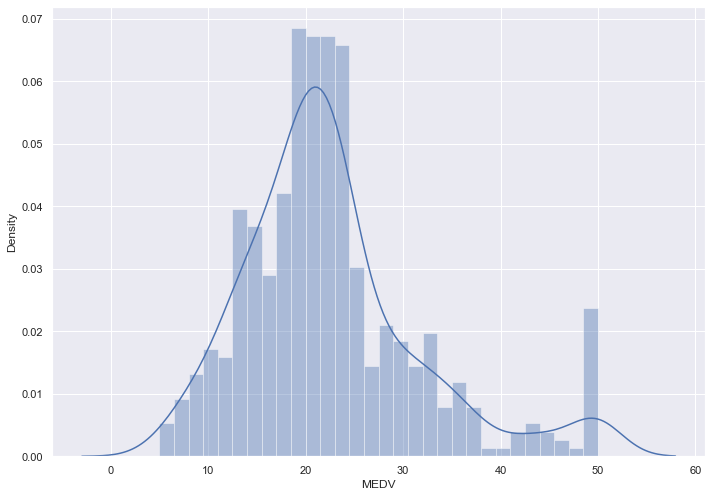

In [15]:
# this sets the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

# this plots a histogram that shows the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers.

#### Step 2: Create a Correlation Matrix

Now, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the Pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

<AxesSubplot:>

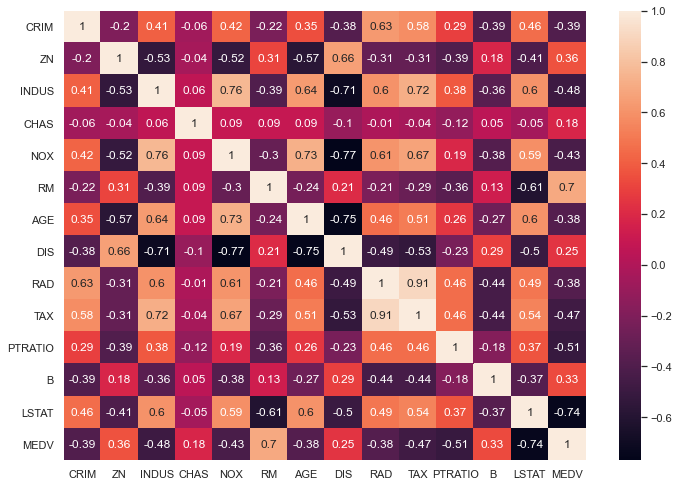

In [8]:
correlation_matrix = boston.corr().round(2)
# We put annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Step 3: Make Observations

Observations from the correlation matrix:

-To fit a linear regression model, we select the features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7), and that LSTAT has a high negative correlation with MEDV (-0.74).

-An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model, and the same goes for the features DIS and AGE which have a correlation of -0.75.

#### Step 4: Create a Scatter Plot

Based on the above observations we will use RM and LSTAT as our features, since they aren't affected by multi-co-linearity (as stated above). Using a scatter plot, let’s see how these features vary with MEDV.

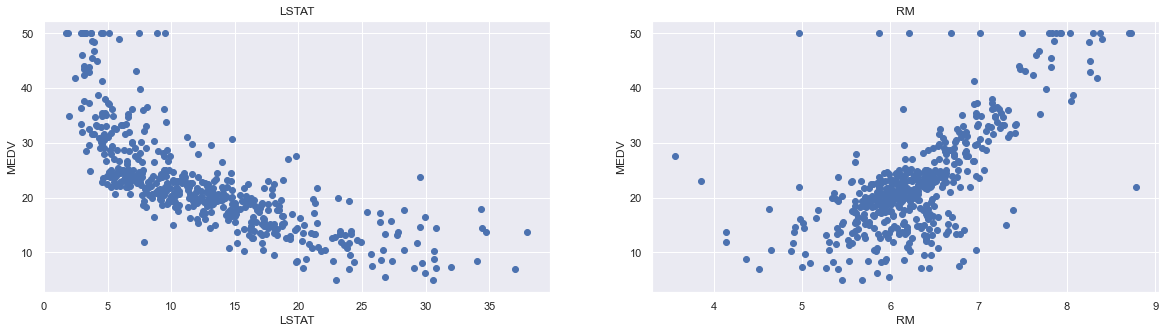

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Step 5: Make More Observations

Observations from the scatter plots:

LSTAT:

-The median prices (MEDV) tend to decrease with an increase in LSTAT, though it doesn’t look to be following a linear line exactly.

RM:

-The median prices (MEDV) increase as the value of RM increases linearly. There are also few outliers and the data seems to be capped at 50.

### 2e. Training the Data

Training data is using (usually) the majority of the data to make a linear/polynomial regression equation.

Testing data is using the leftover data from training to test the model we just made and see if it fits the training results.

We can't use the same data to test and train because then there will be a biased result when we test.

#### Step 1:  Prepare the Data

To prepare the data for training, we  first concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [10]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

#### Step 2: Split the Data into Training and Testing Sets

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use the train_test_split function provided by the scikit-learn library, and then we finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [36]:
print(X_train)
print("---------------------------")
print(Y_train)

     LSTAT     RM
33   18.35  5.701
283   3.16  7.923
418  20.62  5.957
502   9.08  6.120
402  20.31  6.404
..     ...    ...
486  14.98  6.114
189   5.39  7.185
495  17.60  5.670
206  10.97  6.326
355   5.57  5.936

[404 rows x 2 columns]
---------------------------
33     13.1
283    50.0
418     8.8
502    20.6
402    12.1
       ... 
486    19.1
189    34.9
495    23.1
206    24.4
355    20.6
Name: MEDV, Length: 404, dtype: float64


Notice that this model has two variables, so it's in the form:

In [ ]:
y=b0+b1*x1+b2*x2

Where x1 is LSTAT and x2 is RM. What we want to find in the model is b0, b1, and b2.

#### Step 3: Training and Testing the Model

We use scikit-learn’s LinearRegression function to train our model on both the training and test sets.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

#### Step 4: Model Evaluation

Then, we will evaluate our model using the RMSE and R2-score.

In [37]:
from sklearn.metrics import r2_score

# this is the model evaluation for the training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Model Performance for the Training Set:")
print("--------------------------------------")
print('The RMSE is {}'.format(rmse))
print('The R^2 score is {}'.format(r2))
print("\n")

# this is the model evaluation for the testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Model Performance for the Testing Set:")
print("--------------------------------------")
print('The RMSE is {}'.format(rmse))
print('The R^2 score is {}'.format(r2))

Model Performance for the Training Set:
--------------------------------------
The RMSE is 5.637129335071195
The R^2 score is 0.6300745149331701


Model Performance for the Testing Set:
--------------------------------------
The RMSE is 5.137400784702912
The R^2 score is 0.6628996975186952


Or, to find the R^2 score, we can use the score function from sklearn:

In [39]:
print(lin_model.score(X_train,Y_train))
print(lin_model.score(X_test,Y_test))

0.6300745149331701
0.6628996975186952


#### Step 5: The Equation

At the end, we wanted to find the linear regression model equation. We can access the coefficients of LSTAT (x1) and RM (x2), and also the y-intercept by using the "coef_" and "intercept_" functions from sklearn:

In [40]:
print(lin_model.coef_)
print(lin_model.intercept_)

[-0.71722954  4.58938833]
2.7362403426066457


So, the final linear model equation would be:

In [ ]:
y = -0.71722954 * x1 + 4.58938833 * x2 + 2.7362403426066457

Where:

1. y is the dependent variable, or MEDV
2. x1 is the first independent variable, or LSTAT
3. x2 is the second independent variable, or RM

#### Step 6: Practical Uses

The need of finding the linear regression was to use this information practically. We have several observations:

 - For every percentage of the lower status of the population (which is LSTAT), the median value of the houses (which is MEDV) goes *down* by 0.71722954 thousand dollars, or 717.22954 dollars.
 - For every extra room per dwelling (which is RM), the median value of the houses (which is MEDV) goes up by 4.58938833 thousand dollars, or 4589.38833 dollars.

Note that the predicted first data point is (0, 2.736), as in when there are 0 rooms and 0% of the lower status of the population, the median value of the house is 2736 dollars (which is obviously only theoretical, and it means that the y-intercept is 2.736).
 
These are the factors that come into play while buying a house in Boston, and these observations are the goal of the whole operation.

### 2f. Another Way to Find a Model

There are two main ways to perform linear regression in Python — with scikit-learn and Statsmodels. It is also possible to use the Scipy library, but this is not as common as the two other libraries. Let’s look into doing linear regression with Statsmodels now.

#### Step 1: Importing Statsmodels

Statsmodels is "a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.”

It can be imported like this:

In [61]:
import statsmodels.api as sm

#### Step 2: Importing the Dataset

Then, we import a dataset from scikit-learn (the Boston data library we used before):

In [44]:
from sklearn import datasets # this imports datasets from scikit-learn
data = datasets.load_boston() # this loads the Boston dataset from datasets library

First, we should load the data as a pandas data frame for easier analysis and set the median home value as our target variable (scikit-learn does it automatically for the Boston data set, but not Statsmodels):

In [50]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df1 = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value or MEDV) in another DataFrame
target1 = pd.DataFrame(data.target, columns=["MEDV"])

#### Step 3: Fitting the Model

Now, we use the high correlation variables, RM and LSTAT, to fit a linear regression model. 

The model below is only using RM as its independent variable, however.

We do so like this:

In [51]:
import statsmodels.api as sm

X = df1["RM"]
y = target1["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                   3.74e-256
Time:                        21:55:28   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for RM can also be found as so:

In [52]:
print(model.params)

RM    3.65335
dtype: float64


Interpreting the Table:

1. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line (or the residual squared). 
2. Df Residuals and Df Model relates to the degrees of freedom, or “the number of values in the final calculation of a statistic that are free to vary.”
3. The coefficient of 3.6534 means that as the RM variable increases by 1, the predicted value of MEDV (the target variable) increases by 3.6534. 
4. R-squared — the percentage of variance our model explains
5. Standard error - it is the standard deviation of the sampling distribution of a statistic, most commonly of the mean
6. The t scores and p-values, for a hypothesis test — the RM has statistically significant p-value
7. There is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759).

The final linear model equation would be:

In [ ]:
y = 3.65335 * x

Where:

1. y is the dependent variable, or MEDV
2. x is the only independent variable, RM

This model tells us that: 
 - For every extra room per dwelling (which is RM), the median value of the houses (which is MEDV) goes up by 3.65335 thousand dollars, or 3653.35 dollars. 
 
Note that the predicted first data point is (0,0), as in when there are 0 rooms, the median value of the house is 0 (which is obviously only theoretical, and it means that the y-intercept is 0).

#### Step 3 (optional): Adding a Constant

If we want to add a constant to our model, we have to set it by using the command X = sm.add_constant(X) where X is the name of your data frame containing your input (independent) variables. However, there is still one independent variable, RM. We'll be adding on LSTAT in Step 4.

Below is the example:

In [54]:
import statsmodels.api as sm # import statsmodels 

X = df1["RM"] # X usually means our input variables (or independent variables)
y = target1["MEDV"] # Y usually means our output/dependent variable
X = sm.add_constant(X) # let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           2.49e-74
Time:                        22:29:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for RM (and also the coefficient) can also be found as so:

In [55]:
print(model.params)

const   -34.670621
RM        9.102109
dtype: float64


Interpreting the Table:

1. With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -34.67. 
2. We also changed the slope of the RM predictor from 3.634 to 9.1021.

The final linear model equation would be:

In [ ]:
y = 9.102109 * x - 34.670621

Where:

1. y is the dependent variable, or MEDV
2. x is the only independent variable, RM

This model tells us that:

 - For every extra room per dwelling (which is RM), the median value of the houses (which is MEDV) goes up by 9.102109 thousand dollars, or 9102.109 dollars.

Note that the predicted first data point is (0, -34.670621), as in when there are 0 rooms, the median value of the house is -34.670621 (which is obviously only theoretical, and it means that the y-intercept is -34.670621).

#### Step 4 (optional): Fitting a Multivariable Regression

Now let’s try fitting a regression model with more than one variable — we’ll be using RM and LSTAT, as previously mentioned.

The model fitting is the same:

In [57]:
X = df1[['RM', 'LSTAT']]
y = target1['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                        0.00
Time:                        22:34:48   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients for RM and LSTAT can also be found as so:

In [58]:
print(model.params)

RM       4.906906
LSTAT   -0.655740
dtype: float64


Interpreting the Table:

1. We see here that this model has a much higher R-squared value — 0.948, meaning that this model explains 94.8% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher, but this is a pretty high R². 
2. We see that both RM and LSTAT are statistically significant in predicting (or estimating) the median house value 
3. We see that as RM increases by 1, MEDV will increase by 4.9069, and when LSTAT increases by 1, MEDV will decrease by -0.6557
4. LSTAT is the percentage of lower status of the population, and unfortunately we can expect that it will lower the median value of houses. With this same logic, the more rooms in a house, usually the higher its value will be.

The final linear model equation would be:

In [ ]:
y = 4.906906 * x1 - 0.655740 * x2

Where:

1. y is the dependent variable, or MEDV
2. x1 is the first independent variable, RM
3. x2 is the second independent variable, LSTAT

This model tells us that:

 - For every extra room per dwelling (which is RM), the median value of the houses (which is MEDV) goes up by 4.906906 thousand dollars, or 4906.906 dollars.
 - For every percentage of the lower status of the population (which is LSTAT), the median value of the houses (which is MEDV) goes *down* by 0.655740 thousand dollars, or 655.740 dollars.

Note that the predicted first data point is (0,0), as in when there are 0 rooms and 0% of the lower status of the population, the median value of the house is 0 (which is obviously only theoretical, and it means that the y-intercept is 0).

##### These are the examples of both single and multiple linear regression in Statsmodels. We could have used as little or as many variables we wanted in our regression model(s) — up to all 13!

### 2g. Building Your Own

We can build our own linear regression model if we have the proper equations. To do this, we'll only be using the numpy library for the computations, and the R2 score for metrics. But, if you want, you can use matplotlib to graph and check the regression. 

In [62]:
# Our own linear regression model using the Boston dataset:

import numpy as np

n = 404 # this is to fit the training data set
alpha = 0.0001

a_0 = np.zeros((n,2))
a_1 = np.zeros((n,2))

# this section finds the regression model using a while loop:
epochs = 0 
while(epochs < 1000):
    y = a_0 + a_1 * X_train
    error = y - Y_train
    mean_sq_er = np.sum(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n 
    a_1 = a_1 - alpha * 2 * np.sum(error *X_train)/n
    epochs += 1
    if(epochs%10 == 0):
        print(mean_sq_er)

ValueError: operands could not be broadcast together with shapes (404,2) (406,) 